In [3]:
from itertools import product, repeat
import multiprocessing

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

from src.simulation import Simulation
from src.genetic import fitness
from src.bruteforce import BruteForcePlatform

In [4]:
p_min = -100
p_max = 101
p_div = 10.0

i_min = -100
i_max = 101
i_div = 500.0

d_min = -100
d_max = 101
d_div = 0.2

p = [x / p_div for x in range(p_min, p_max, 7)]
i = [x / i_div for x in range(i_min, i_max, 7)]
d = [x / d_div for x in range(d_min, d_max, 7)]

In [5]:
pid_combinations = list(product(p, i, d))
num_pid_combinations = len(pid_combinations)

num_pid_combinations

24389

In [89]:
setpoints = [-10] * 30 * 5 + [6] * 30 * 5 + [0] * 30 * 20 + [7] * 30 * 35
external_force = [0] * 30 * 14 + [-2] * 30 * 51
mass = 0.2
delta_t = 1 / 30
simulation = Simulation(mass=mass, delta_t=delta_t)
weight_factor = 0.6

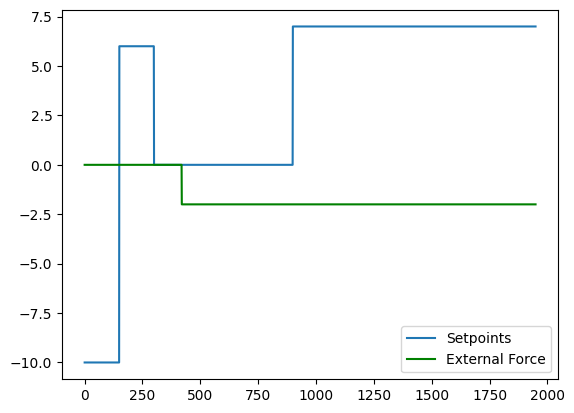

In [90]:
plt.plot(setpoints)
plt.plot(external_force, c='g')

plt.legend(['Setpoints', 'External Force'])

plt.show()

In [91]:
pool = multiprocessing.Pool(multiprocessing.cpu_count())
results = pool.starmap(
    BruteForcePlatform.execute,
    zip(
        pid_combinations, 
        repeat(mass), 
        repeat(delta_t), 
        repeat(setpoints), 
        repeat(external_force),
        repeat(fitness), 
        repeat(weight_factor)
    )
)
winner = results[np.argmin([result[3] for result in results])]
print(f'Error-Score: {winner[3]}')
print(f'P: {winner[0]}')
print(f'I: {winner[1]}')
print(f'D: {winner[2]}')

Error-Score: 1082.3446342119232
P: -10.0
I: -0.032
D: -220.0


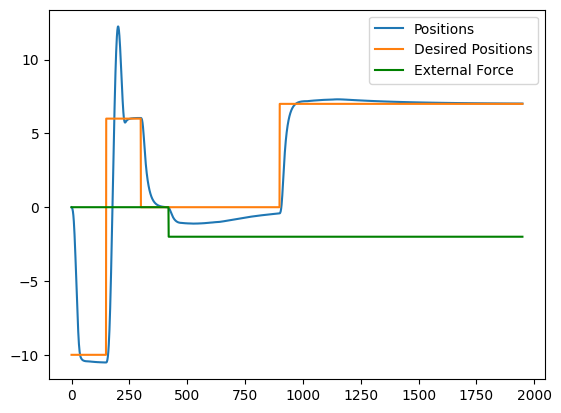

In [92]:
plt.plot(winner[4])
plt.plot(setpoints)
plt.plot(external_force, c='g')

plt.legend(['Positions', 'Desired Positions', 'External Force'])

plt.show()

In [38]:
%matplotlib notebook
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

threshold = np.percentile(np.array(results)[:, 3], 2)
ax.scatter([x[0] for x in results if x[3] < threshold], [x[1] for x in results if x[3] < threshold], [x[2] for x in results if x[3] < threshold], c=[x[3] for x in results if x[3] < threshold])

ax.set_xlim(p_min / p_div, p_max / p_div)
ax.set_ylim(i_min / i_div, i_max / i_div)
ax.set_zlim(d_min / d_div, d_max / d_div)

ax.set_xlabel('P')
ax.set_ylabel('I')
ax.set_zlabel('D')

sm = ScalarMappable(cmap=plt.cm.viridis)
sm.set_array([x[3] for x in results if x[3] < threshold])

# Add color bar
fig.colorbar(sm, ax=ax)

plt.show()

<IPython.core.display.Javascript object>